In [1]:
#07/09//2019 3.hafta cts
#ols regression
import statsmodels.formula.api as smf
import os
os.getcwd()

'C:\\Users\\asus1'

In [2]:
os.chdir('C:/Users/asus1/Desktop/bootcamp/dersler/hafta3')
os.getcwd()

'C:\\Users\\asus1\\Desktop\\bootcamp\\dersler\\hafta3'

In [3]:
import pandas as pd
ad=pd.read_csv('Advertising.csv',usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
#herhangi null bi değişken var mı yok mu
df.isnull().values.any()

False

In [7]:
#korelasyon iişkisine bakıyoruz, 1 e ne kadar yakınsa o kadar güçlü bir ilişki vardır
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
import seaborn as sns

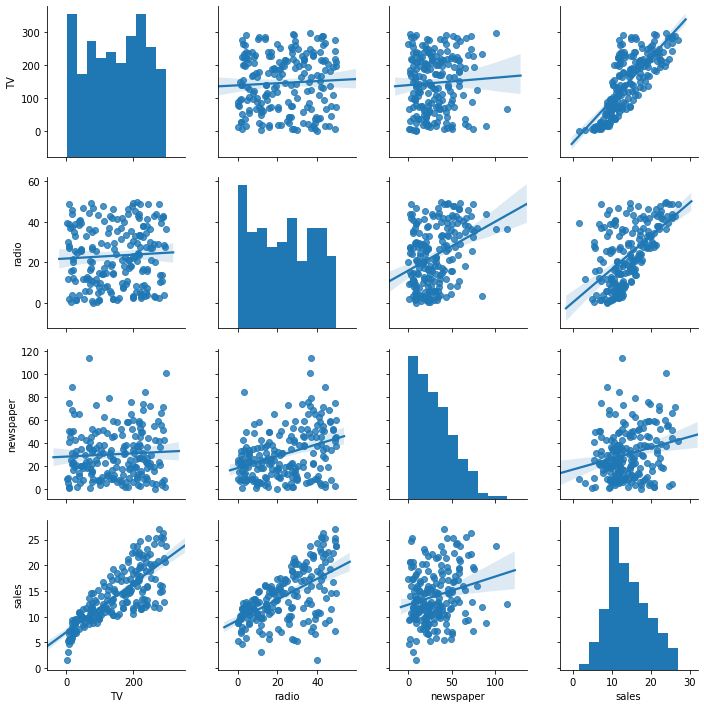

In [9]:
sns.pairplot(df,kind="reg")  ###fit linear regression
#en alttaki satır olan satışla başlayalım,satışla Tv arasında bir lineer ilişi olduğu açık
##mesela radio ile sales arasında çok bir alaka yok doğruda açı bile yok

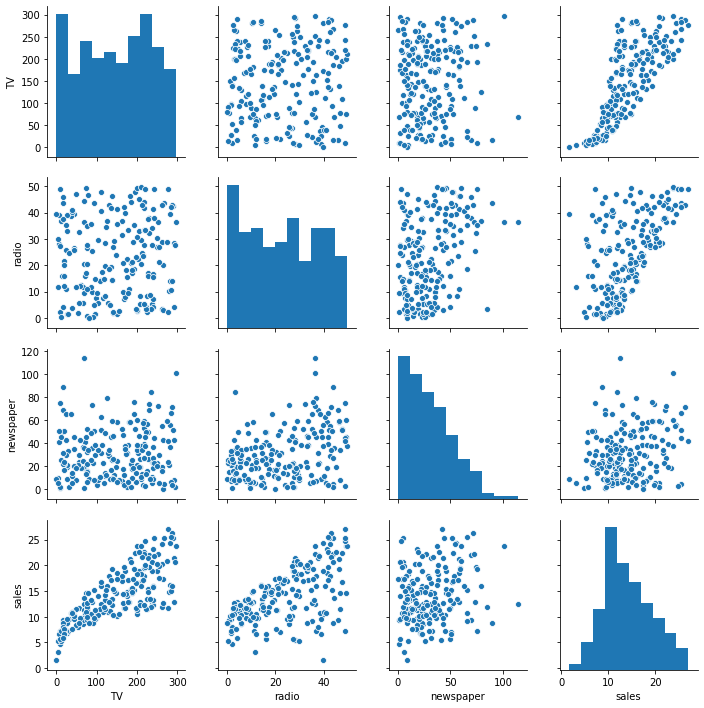

In [10]:
sns.pairplot(df,kind="scatter")
#regresyon olmadan yalnızca scatter plot çizimi

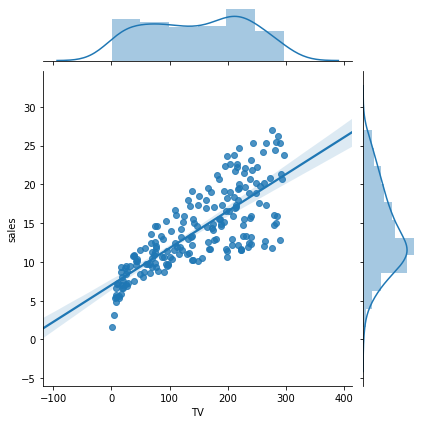

In [11]:
sns.jointplot(x="TV", y="sales",data=df, kind="reg")
#tvnin dağılımı, salesin dağılımlarını da çiziyor

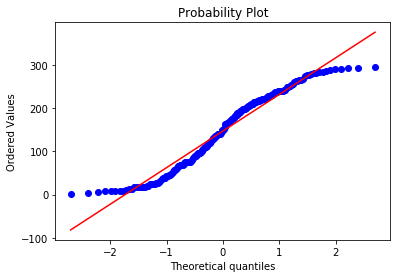

In [12]:
import scipy.stats as stats
import pylab
stats.probplot(df["TV"], dist="norm",plot=pylab) 
pylab.show()


#TV normal mi değil mi ona baktık, olmadığını gördük

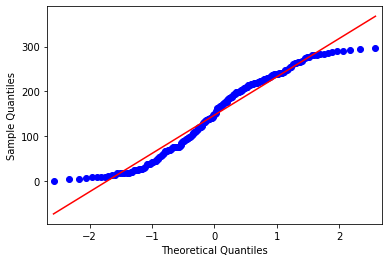

In [13]:
import statsmodels.api as sm
sm.qqplot(df["TV"], line = 's')
pylab.show()


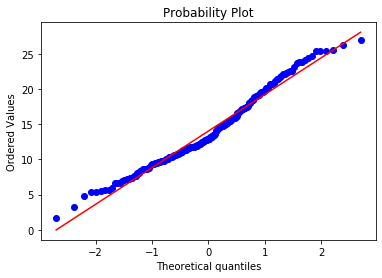

In [14]:
import scipy.stats as stats
import pylab
stats.probplot(df["sales"], dist="norm",plot=pylab) 
pylab.show()
#sales daha normale yakın

In [15]:
import statsmodels.api as sm
X = df[["TV"]] #double p
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
X=sm.add_constant(X)  #Xin yanına onun size ı kadar ekliyoruz.constantları eklemek gerekir
X[0:5]

C:\Users\asus1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [17]:
y = df["sales"] #double p
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [18]:
lm = sm.OLS(y,X)  #satışları(salesleri) X ile modelle diyoruz, model kurduk
model = lm.fit()
model.summary()

#çıkan pvaluelar alfadan küçük, yani verim benim için anlamlı
#tahmini_sales=7.03 + 0.04TV + error value
#coefde yazan ilki B0(constant),B1.. diye devam ediyor
#prob(fstatistic) çok küçük kalmış anlamlı değişken olduğunu gösteriyor zaten
#R_squared 1e ne kadar yakınsa modelimin daha doğru olduğunu gösteriyor,0.95 gibi bir değer çıkmışsa da diğer testlerden de emin olmak lazım

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        11:03:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#bir şeyin bir şeye etkisinin nasıl olduğunu görmek için formula ile yapıyoruz,sales ı TV lerler açıklamaya çalışıyorum
import statsmodels.formula.api as smf
lm=smf.ols("sales ~ TV",df)
model=lm.fit()
model.summary()
#parametreleri çekti B0 ve B1 i çektik
model.params
model.summary().tables[1]
#güven aralığını söylüyor
model.conf_int()


,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [20]:
model.f_pvalue
print("f_pvalue :","%.4f" % model.f_pvalue)
print("fvalue :","%.2f" % model.fvalue)
print("tvalue :","%.2f" % model.tvalues[0:1])

f_pvalue : 0.0000
fvalue : 312.14
tvalue : 15.36


In [21]:
model.rsquared_adj


0.6099148238341623

In [22]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [23]:
y[0:5]
print("Sales =" + str("%.2f" % model.params[0])+ "+TV" + "*"+ str("%.2f" % model.params[1]))

Sales =7.03+TV*0.05


Text(0, 0.5, 'Satış Sayısı')

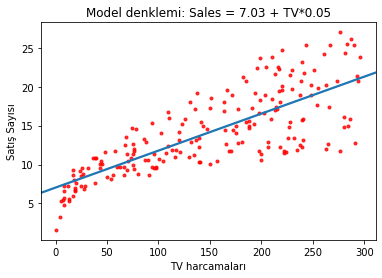

In [24]:
g = sns.regplot(df["TV"],df["sales"],ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model denklemi: Sales = 7.03 + TV*0.05")
g.set_xlabel("TV harcamaları")
g.set_ylabel("Satış Sayısı")

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
x = df[["TV"]]
y = df["sales"]
reg=LinearRegression()
#ben x im ile y yi açıklıycam
model=reg.fit(x,y)
model.intercept_


7.032593549127693

In [27]:
model.coef_

array([0.04753664])

In [28]:
model.score(x,y)
#modelin iyiliğini gösteriyor

0.611875050850071

In [29]:
#x in modeldeki tahminlerini bana getir
model.predict(x)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [30]:
## 30 değeri için modelim bana ne üretecek onu buluyorum
model.predict([[30]])

array([8.45869276])

In [31]:
## verdiğim belirli değerler için modelim ne üretecek
yeni_veri= [[5],[90],[200]]
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
lm=smf.ols("sales ~ TV",df)
model = lm.fit()
model.summary()
##çoklu modelleri karşılaştırmak için de kullanılabilir, hata oranının ben daha düşük olmasını isterim
mse=mean_squared_error(y,model.fittedvalues)  #gerçek ylerim ile fitted değerleri ölçüyoruz
mse


10.512652915656757

In [33]:
import numpy as np
rmse=np.sqrt(mse)
rmse

3.2423221486546887

In [34]:
reg.predict(x)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [35]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [36]:
k_t = pd.DataFrame({"gercek_y":y[0:10], "tahmin_y":reg.predict(x)[0:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [37]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [38]:
##enküçük kareler yöntemini kendimiz yapıyoruz şimdi
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [39]:
np.sum(k_t["hata_kare"])
np.mean(k_t["hata_kare"])
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996776

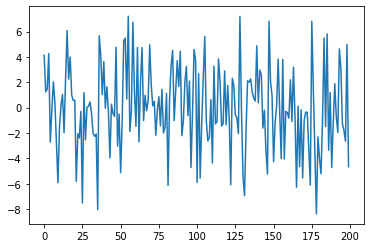

In [40]:
import matplotlib.pyplot as plt
model.resid[0:10]
plt.plot(model.resid)

In [41]:
##08/09/2019
import pandas as pd
ad = pd.read_csv("Advertising.csv",usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [43]:
#salesı predict etmeye çalışıyorum, data setimden sales hariç olanları al diyorum,diğer üçüyle salesi tahmin edicem
X=df.drop("sales",axis=1)
y=df["sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape


(160, 3)

In [44]:
y_train.shape

(160,)

In [45]:
print(X_test.shape)
print(y_test.shape)
training=y.copy()
training.head()

(40, 3)
(40,)


0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [46]:
#ytraini xler ile açıklıycam
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

#yorumlayalım, hepsinin pvaluesi 0.05den küçük yani anlamlı değişkenler benim için
#TAHMİNİ_sales=0.0531TV + 0.2188RADIO + 0.0239NEWSPAPER çıkıyor
## Rsquared çok yüksek

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sat, 21 Sep 2019   Prob (F-statistic):                   1.28e-137
Time:                        11:03:52   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#detect outliers, errorların outlierlarını detect ediyoruz aslında, datanın değil, çünkü biz errorunda normal dağılımdan geldiğini kabul ediyoruz ya
influence=model.get_influence()
influence

In [48]:
resid_student = influence.resid_studentized_external
(cooks,p) = influence.cooks_distance
(dffits,p) = influence.dffits
leverage= influence.hat_matrix_diag


In [49]:
import seaborn as sns

Leverage vs. Studentized Residuals


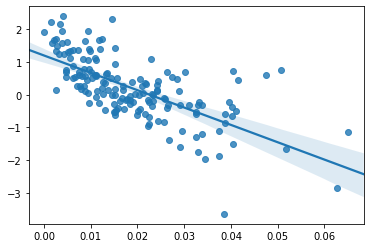

In [50]:
print("Leverage vs. Studentized Residuals")
##çizdirip bakıyoruz,modeldeki residualların dağılımına,ayrık uzak residuallar var, outlier var, diyorumki ya normal dağılımdan gelmiyor ya da constanst varyans olmayabilir, şimdi test edicez bunu belkide modeli pek etkileyecek seviyede değildir
##leverage bizim verilerimizden gelen,pearson ise modelden gelen
sns.regplot(leverage, model.resid_pearson, fit_reg=True)  #True olursa regresyon çizgisini de çizer, line fit eder


In [51]:
advres=pd.concat([ad, pd.Series(model.resid , name="resid"),
                 pd.Series(model.predict(), name="predict")],axis=1)

model.predict()
advres.head()


,TV,radio,newspaper,sales,resid,predict
0,230.1,37.8,69.2,22.1,-0.041335,8.396375
1,44.5,39.3,45.1,10.4,-1.637545,11.587710
2,17.2,45.9,69.3,9.3,-3.308953,8.967927
3,151.5,41.3,58.5,18.5,0.022542,6.501963
4,180.8,10.8,58.4,12.9,-0.458176,12.793680


C:\Users\asus1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\asus1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


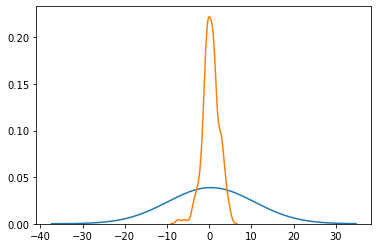

In [52]:
#model.resid
sns.kdeplot(np.array(advres.resid),bw=10)
sns.distplot(np.array(advres.resid),hist=False)
##kırmızı olan residualların dağılımı

C:\Users\asus1\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\asus1\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\asus1\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


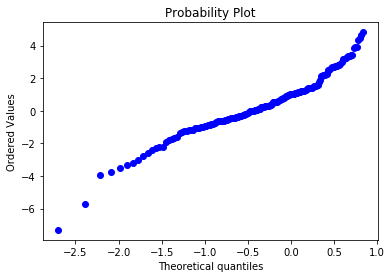

In [53]:
#probability plotunu çizdirelim,beklenen line fit etmiş olması
import pylab
stats.probplot(advres.resid, dist="norm",plot=pylab)
pylab.show()

In [54]:
##shapiro yapalım residuallara,advres datasında nan değerler geldi o yüzden dropna() yapmamız gerekir, eğitim datasındaki noneları kaldırmak için

from scipy.stats import shapiro
advres=advres.dropna()
stat,p=shapiro(advres.resid)
print(stat,p)
alpha=0.05
if p > alpha:
    print("Hatalar normal dağılımdan geliyor (Fail to reject H0)")
else:
    print("Hatalar normal dağılımdan gelmemektedir (Reject H0)")
    

0.9722059965133667 0.010207269340753555
Hatalar normal dağılımdan gelmemektedir (Reject H0)


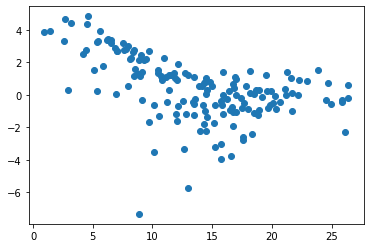

In [55]:
resid=model.resid
plt.scatter(model.predict(),resid)
##residuallarımızın scatter plot dağılımına baktık, rastgele dağılmıyor değişik bir patterne sahip

In [56]:
#regresyon modeli oluşturma, farklı kütüphaneden,yine salesı predict edicem
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
#df,full olan datam
lm=smf.ols("sales ~ TV+newspaper+radio",df).fit()
lm.summary()
##yorum:pvalueya bakıldığında newspaper datası veriyi açıklamak için anlamsız oldu(newspaperin betası=0),Fstat oldukça küçük, en az bir tanesi farklı olduğunu gösteriyor yani
##intercept dediğimiz constantımız

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           1.58e-96
Time:                        11:03:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
y,X = dmatrices("sales ~ TV+newspaper+radio",data=df,return_type="dataframe")
y
X
##multicolonaritye bakıyoruz
##Xlerden herhangi biri 10'dan büyükse multicolonarity problemi var yani x diğerleriyle corrale denir
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif


[6.848899953334954, 1.0046107849396502, 1.1451873787239288, 1.1449519171055353]

In [59]:
##aynısını scikit learn ile kurucaz,farklı model
lm=LinearRegression()
model=lm.fit(X_train,y_train)
model.intercept_


2.979067338122629

In [60]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [61]:
#model denklemi ; sales=2.97+TV0.04+RADIO0.18+0.002NEWSPAPER
lm=LinearRegression()

In [62]:
model=lm.fit(X_train,y_train)
print(model.intercept_)
model.coef_

2.979067338122629


array([0.04472952, 0.18919505, 0.00276111])

In [63]:
####örneğin 30 birim TV, 10 tne radyo, 40 tane newspaper için salesi bul
yeni_veri=[[30],[10],[40]]
yeni_veri=pd.DataFrame(yeni_veri).T
model.predict(yeni_veri)

array([6.32334798])

In [64]:
###rmse değerlerini karşılaştırdık, istediğim test ile modelin rmse'nin yakın çıkması, yakın olması modelin iyi olduğu anlamına gelir
from sklearn.metrics import mean_squared_error,r2_score
rmse=np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print(rmse)
testrmse=np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(testrmse)

1.644727765644337
1.7815996615334502


In [65]:
model.score(X_train, y_train)
cross_val_score(model, X_train, y_train, cv=10,scoring="r2").mean()
trainmse=np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean()
print(trainmse)
testmse=np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, scoring="neg_mean_squared_error")).mean()
print(testmse)

1.6513523730313335
1.8462778823997095


In [66]:
###PCR'a geçiyoruz
import pandas as pd
hit=pd.read_csv('Hitters.csv')
df=hit.copy()
df=df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [69]:
##dummy yaratıyoruz
import pandas as pd
dms=pd.get_dummies(df[['League','Division', 'NewLeague']])
dms.head()


,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [70]:
dms = pd.get_dummies(df[['League','Division','NewLeague']])
dms.head()
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X_.head()
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [71]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [72]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_train",y_test.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_train (66,)


In [73]:
training=df.copy()
print("training",training.shape)

training (263, 20)


In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca=PCA()

In [75]:
###bağımsız değişkenlerime göre bana pca fit et diyorum yani Xlerime göre
X_reduced_train=pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [76]:
#bunlar benim transform olmuş xlerim, gerçek xlerim değil
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [77]:
##şimdi modeli kurduk,trainlerle fit edelim,xleri ylerler eğit
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)

In [78]:
pcr_model.intercept_

543.4834416243655

In [79]:
pcr_model.coef_
##bunlar hepsi

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [80]:
##şu an train için tahmin et
y_pred=pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [81]:
####14/09/2019 devamı
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train,y_pred))


289.3292825564976

In [82]:
df["Salary"].mean()

535.9258821292775

In [83]:
pca2=PCA()
X_reduced_test=pca2.fit_transform(scale(X_test))
y_pred=pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test,y_pred))

405.15753641499646

In [84]:
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train[:,0:6],y_train)
print(pcr_model.intercept_)
print(pcr_model.coef_)

543.4834416243655
[111.13977427 -29.34209502  26.29799759 -38.47549852 -56.9200785
  54.44779423]


In [85]:
y_pred=pcr_model.predict(X_reduced_train[:,0:6]) ##reduce x den ilk 6sını al ve git bunlarla test yap
print("modelden elde edilen hata" , np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred= pcr_model.predict(X_reduced_test[:,0:6])
print("testten elde edilen hata" , np.sqrt(mean_squared_error(y_test,y_pred)))

##ilk 6 pca yı kullan, yleri tahmin et, train olan Xlerin ilk 6 pcaını al, testin git ilk 6 pca yını al prediction yap, gel bu hatalara bakalım


modelden elde edilen hata 308.8265983094501
testten elde edilen hata 393.1198700096223


In [86]:
#r2_score(y_train, y_pred)  ### hata verdi !!!!!!!

In [87]:
from sklearn import model_selection
#n_split=kaç tane split oluştursun, shuffle karıştırsın seçsin tekrarlı mı sçsin,10 tane subsplitler bul bana, ben pca yapıcam
#hangisinde daha az rmse i olan veri var bilmyorum ona bakayım
cv_10 = model_selection.KFold(n_splits = 10, shuffle=True, random_state=1)

In [88]:
lm=LinearRegression()

In [89]:
RMSE = []
##burası hep negatif döndüğü için -1 ile çarparız, her i değiştiğinde bana 1li kur 2li kur 3lü pca kur gibi baıyorum ve hepsinde rmse hesaplatıyorum.
for i in np.arange(1,X_reduced_train.shape[1] + 1):
    score=np.sqrt(-1*model_selection.cross_val_score(lm,X_reduced_train[:,:i], 
                                                     y_train.ravel(),
                                                     cv=cv_10,scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [90]:
RMSE
##rmse in en küçük olduğu yer önemli, demekki ben en küçük hatayla i tane pca kullanarak seçebilirim
## datama baktığımda 7.en küçük olduğu için en iyi pca yi 7li elde ederim.
### PCA'ın amacı benim elimdeki X değişkenlerimin hangilerinin işe yarayacağını belirlemek için kullanılıyor aslında
### 100 tane x yerine 10 tane x kullan , bir ön eleme sağlıyor PCA (nümerik değerlere uygulanır sadece !!!!!!)
## cross validation ise kendimi güvende tutmak için yaptığım bir şey, datayı farklı farklı gruplara bölüp bunlarda grup grup 
## test train seçiyoruz, datayı kaydırarak kısım kıısm train ve test seçiyosun, farklı fakrlı trainler farklı testler seçiyorum.

[339.00500170955814,
 335.4728032081954,
 335.2590543755473,
 335.7884270015903,
 331.0974063017349,
 329.0340331060009,
 328.19368073916246,
 331.4554758418423,
 333.6775747849661,
 339.50330386848293,
 340.5292981595513,
 344.5766545758868,
 351.26086167973125,
 356.4667660069187,
 357.230916418857,
 342.78343615942964,
 343.74562772537445,
 344.7519862573738,
 353.37050529908544]

Text(0.5, 1.0, 'Maaş Tahmin Modeli için PCR Model tuning')

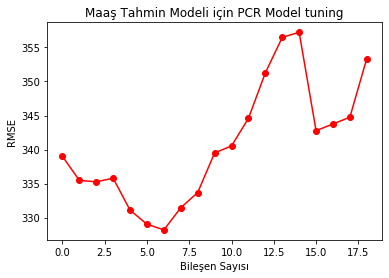

In [91]:
plt.plot(RMSE, '-ro')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli için PCR Model tuning')

In [92]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [93]:
diabetes = pd.read_csv("diabetes.csv")
df=diabetes.copy()
df=df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [95]:
##outcomeların sayısını bulduk
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

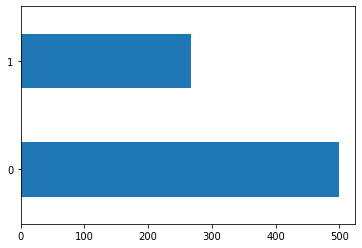

In [96]:
df["Outcome"].value_counts().plot.barh()

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [98]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)

In [99]:
##statsmodels
loj=sm.Logit(y,X)
loj_model=loj.fit()
loj_model.summary()

###hangi değişkenlerin anlamlı olduğuna bakacağız, bakıldığında pregnancies, glucose, bloodpressure ların etkili olduğunu söylüyo sadece

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sat, 21 Sep 2019   Pseudo R-squ.:                 0.05922
Time:                        11:04:00   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [127]:
#scikit learn 
from sklearn.linear_model import LogisticRegression
loj=LogisticRegression(solver = "liblinear")
##lojistik regresyon kursun
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
loj_model.intercept_ #Beta0

array([-5.89159518])

In [129]:
loj_model.coef_ #Betalarım

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

In [130]:
y_pred=loj_model.predict(X)

In [131]:
pr=confusion_matrix(y,y_pred)

## 500 tane 0 var, modelim 569 tane bulmus (448+121)
## 298 tane 1 var, modelim 199 tane bulmuş

In [132]:
pr

array([[448,  52],
       [121, 147]], dtype=int64)

In [133]:
accuracy_score(y,y_pred)

0.7747395833333334

In [134]:
###elle girelim
TN = pr[0][0]
FP = pr[0][1]
FN = pr[1][0]
TP = pr[1][1]
n=798 

In [135]:
###elle girelim
acc = (TP + TN)/n
mis_rate=(FP+FN)/n
tp_rate1 = (TP)/(TP+FP)
tp_rate0 = (TN)/(TN+FN)
print("Accuracy: " , acc)
print("Mis Rate: ", mis_rate)
print("Mis Rate: ", mis_rate)

Accuracy:  0.7456140350877193
Mis Rate:  0.21679197994987467
Mis Rate:  0.21679197994987467


In [136]:
print(classification_report(y,y_pred))

###recall e bakıldığında 0 ları tahmin etmede güzelken 1 ler için iyi tahmin edemediği görülmektedir.
##weighted olan önemli olan burada, fakat en temizi 0 lara ve 1 lere nasıl davranıyorum onu direk görebiliyorum

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [137]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [138]:
loj_model.predict_proba(X)[0:10]
## 0 olma ihtimali, 1 olma ihtimalini gösteriyor

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

In [139]:
##gerçek ylerimi getiricem şimdi
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [140]:
###prob olarak prediction al bana 
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [141]:
### olasılıkları getirdik
y_probs[0:10]

array([0.64959289, 0.08298071, 0.77525915, 0.07861124, 0.8327758 ,
       0.20101325, 0.11980894, 0.7218731 , 0.67939057, 0.07727116])

In [142]:
##şimdi o thresholdu 0.5 yaptım 
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [143]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [144]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [145]:
accuracy_score(y,y_pred)

0.7747395833333334

In [146]:
print(classification_report(y,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [147]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64959289, 0.08298071, 0.77525915, 0.07861124, 0.8327758 ])

In [148]:
### gerçek ylerle tahmin ettiklerimle bana bir roc curve getir diyorum, bunun 1 e yakın olmasını istiyorum ben aslındafakat 0,72 de fena değil
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
logit_roc_auc 

 

0.7222537313432836

In [149]:
## şu threshold ile şu ihtimali hesapla tek tek, 1.964 thresholdu için fpr oranı ve trp oranını hesaplıyor
## thresholdu değiştire değiştire dogruları ve yanlışları tahmin ediyoruz
fpr,tpr,thresholds = roc_curve(y,loj_model.predict_proba(X)[:,1])
print("false positive rate: ", fpr[0:10])
print("true positive rate: ",tpr[0:10])
print("threshold: ",thresholds[0:10])

false positive rate:  [0.    0.    0.    0.002 0.002 0.004 0.004 0.006 0.006 0.008]
true positive rate:  [0.         0.00373134 0.01119403 0.01119403 0.03731343 0.03731343
 0.06343284 0.06343284 0.08208955 0.08208955]
threshold:  [1.96477167 0.96477167 0.94295527 0.92647918 0.9029745  0.89771194
 0.87329592 0.87316271 0.84278751 0.84276872]


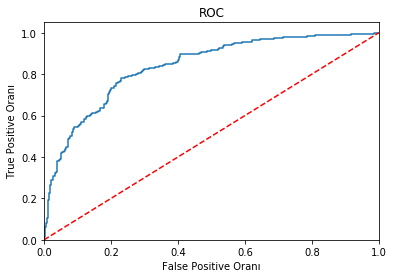

In [150]:
### en baştan curve eden ve sonra converge eden bir eğri bekliyorum ki grafiğin altında kalan 1e daha yakın olsun
plt.figure()
plt.plot(fpr,tpr,label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [159]:
## train test diye bölelim
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)


In [160]:
loj= logisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

NameError: name 'logisticRegression' is not defined

In [161]:
y_predict = loj_model.predict(X_test)

In [163]:
accuracy_score(y_test,loj_model.predict(X_test))
cross_val_score(loj_model, X_test,y_test,cv=10).mean()

0.7704710144927536